## Introducing Kernels

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


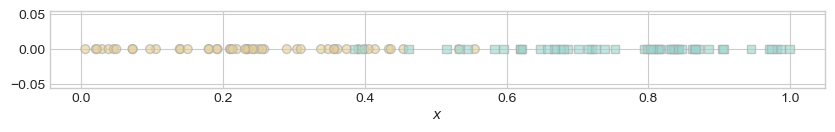

In [2]:
import torch 
from matplotlib import pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')
n_points = 100
x = torch.rand(n_points)
y = 1*((x + 0.3*(torch.rand(n_points) - 0.5)) > 0.5 )

def plot_1d_classification_data(x, y, ax):
    
    targets = [0, 1]
    markers = ["o" , ","]
    for i in range(2):
        ix = y == targets[i]
        ax.scatter(x[ix], torch.zeros_like(x[ix]), s = 40,  c = y[ix], facecolors = "none", edgecolors = "darkgrey", cmap = "BrBG", vmin = -1, vmax = 2, alpha = 0.6, marker = markers[i], )
    ax.set(xlabel = r"$x$")
    
fig, ax = plt.subplots(figsize = (10, 1))
plot_1d_classification_data(x, y, ax)

In [13]:
def compute_score(x, y, gamma, x_space):
    diffs = x_space[:, None] - x
    s = torch.mean(y * torch.exp(-gamma * diffs**2), dim = 1)
    return s

gamma = 10000
x_space = torch.linspace(0, 1, 1001)
s = compute_score(x, y, gamma, x_space)



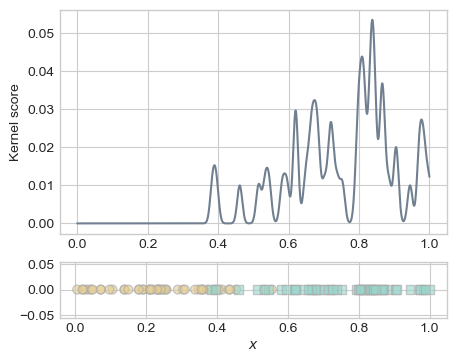

In [14]:
fig, ax = plt.subplots(2, 1, figsize = (5, 4), height_ratios= (0.8, 0.2))
ax[0].plot(x_space, s, color = "slategrey")
ax[0].set(ylabel = "Kernel score")
plot_1d_classification_data(x, y, ax[1])